# Exercise 1.5 | Text Mining

### Contents
##### 1. Importing Libraries
##### 2. Importing the .txt file
##### 3. Tokenize words & create plot of 10 most common words
##### 4. Remove 'stopwords', punctuation, and rerun the plot chart
##### 5. Create a tags list using TextBlob
##### 6. Create top 10 POS tags list
##### 7. Plot Top 10 POS list using seaborn
##### 8. Create bar plots for top 15 nouns, verbs & adjectives
##### 9. Create countries dataframe
##### 10. Plotting country mention frequency

##### 1. Importing Libraries (Task 2)

In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


##### 2. Importing the .txt file (Task 3)

In [3]:
# Importing the necessary txt file we scraped in Exercise 1.4

with open('20th_century_scrape', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

##### 3. Tokenize words & create plot of 10 most common words

In [16]:
# Task 4
# Word tokenization & plotting of bar chart

In [7]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)

# Slice the list to include only the first 100 words
tokenized_word = tokenized_word[:1000]
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'are', 'at', 'the', 'top', 'of', 'the', 'page', '.', 'Search', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1Historical', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historical', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1

In [8]:
# Next, we will create a 'Word frequency distrobution' list. We will use this to help create the plot chart

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 474 samples and 1000 outcomes>


In [9]:
dist_words.most_common(10)

[('the', 76),
 (',', 39),
 ('of', 30),
 ('.', 28),
 ('to', 27),
 ('in', 18),
 ('and', 18),
 ('The', 17),
 ('[', 15),
 (']', 15)]

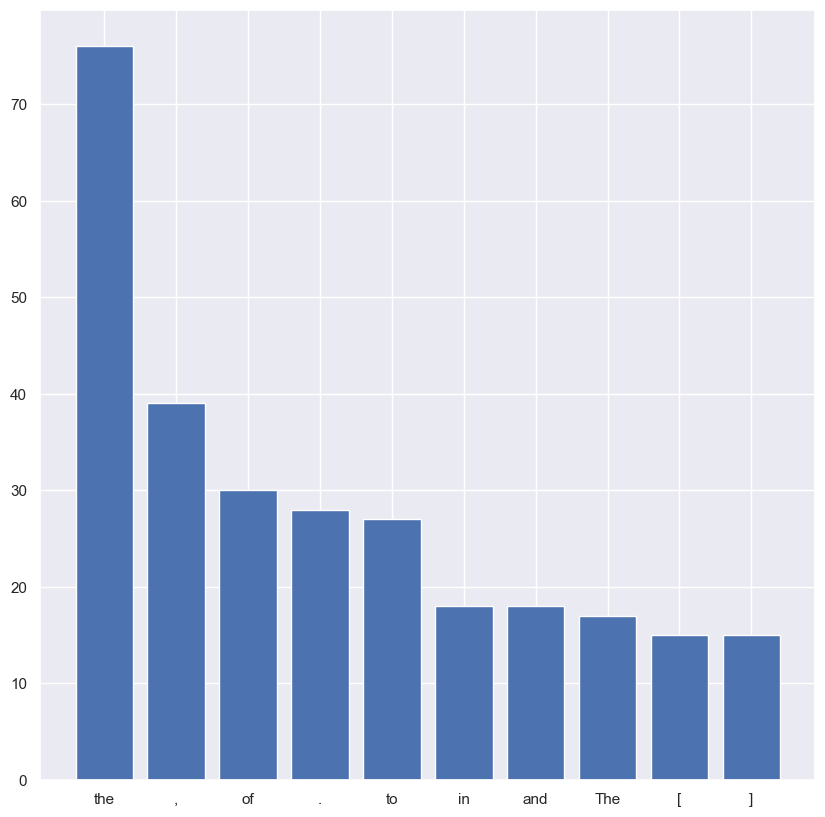

In [15]:
# Sort the dictionary by values in descending order and take the top 10 items
top_10_words = dict(sorted(dist_words.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(10, 10))
plt.bar(top_10_words.keys(), top_10_words.values())
plt.show()

##### 4. Remove 'stopwords', punctuation, and rerun the plot chart

In [17]:
# We will remove stopwords, and clean up punctuation, before running the plot chart again (Task 5)

# Import stopwords from NLTK
from nltk.corpus import stopwords

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
# Removing stopwords in words

filtered_words = []  # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [20]:
# Create a new FreqDist for filtered–words

dist_words_filter = FreqDist(filtered_words)
print (dist_words_filter)

<FreqDist with 420 samples and 727 outcomes>


In [21]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [22]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Languages    Language    links    top    page         Search    Search    Create    account    Log    Personal    tools    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top          Historical    events      th    century    Toggle    Historical    events      th    century    subsection       The    world    beginning    century                   The    war    end    wars               World    War    I                                          The    Russian    Revolution    Communism       Between    wars         Economic    depression         The    rise    dictatorship      

In [23]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'top', 'page', 'Search', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historical', 'events', 'th', 'century', 'Toggle', 'Historical', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turnin

In [24]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

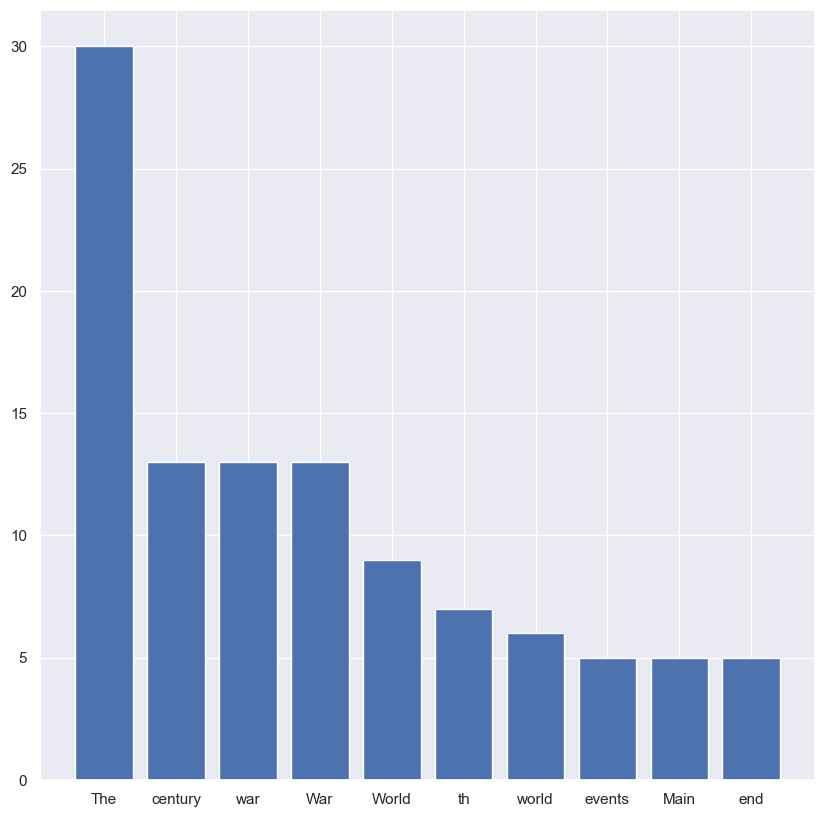

In [25]:
# Frequency Distribution Bar Chart

# Sort the dictionary by values in descending order and take the top 10 items
top_10_words2 = dict(sorted(dist_words_filter_2.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(10, 10))
plt.bar(top_10_words2.keys(), top_10_words2.values())
plt.show()

In [32]:
# Task 5 Feedback - Our list no longer includes puncuation, and is starting to look more like how I would predict this result to look - with the inclusion of words like 'century, war, world, and events' 
# I feel this list could still be improved with more cleaning, and hopefully, removal of duplicates like 'war' & 'War.. for example. I'll apply a code to our frequency distrobution ('FreqDist') list that will help limit, and hopefully condense the words to remove any duplicates from our list.
# Still a couple of roque characters in there as well. 'The', and 'th'. I'll clean this up a bit more

In [27]:
dist_words_filter_2.most_common(20)

[('The', 30),
 ('century', 13),
 ('war', 13),
 ('War', 13),
 ('World', 9),
 ('th', 7),
 ('world', 6),
 ('events', 5),
 ('Main', 5),
 ('end', 5),
 ('Germany', 5),
 ('links', 4),
 ('I', 4),
 ('Empire', 4),
 ('Russia', 4),
 ('move', 3),
 ('sidebar', 3),
 ('hide', 3),
 ('Historical', 3),
 ('beginning', 3)]

In [28]:
new_stopwords_2 = ["The", "th", 'I']

In [29]:
# Removing more stopwords
filtered_dist_words_filter_2 = [(word, count)
                                for word, count in dist_words_filter_2.items() 
                                if word not in new_stopwords_2]

In [30]:
new_freq_dist = FreqDist(dict(filtered_dist_words_filter_2))
print (new_freq_dist)

<FreqDist with 369 samples and 526 outcomes>


In [31]:
new_freq_dist.most_common(20)

[('century', 13),
 ('war', 13),
 ('War', 13),
 ('World', 9),
 ('world', 6),
 ('events', 5),
 ('Main', 5),
 ('end', 5),
 ('Germany', 5),
 ('links', 4),
 ('Empire', 4),
 ('Russia', 4),
 ('move', 3),
 ('sidebar', 3),
 ('hide', 3),
 ('Historical', 3),
 ('beginning', 3),
 ('wars', 3),
 ('Allied', 3),
 ('Cold', 3)]

In [33]:
# We're going to attempt to reduce the instances of duplicates from the dataset by making all words 'lowercase'. This will make the process treat all words as the same word. 

In [36]:
# Convert all words to lowercase before counting frequencies
condensed_freq_dist = {}
for word, freq in new_freq_dist.items():
    # Convert the word to lowercase
    lowercase_word = word.lower()
    # Update the frequency count in the condensed frequency distribution
    condensed_freq_dist[lowercase_word] = condensed_freq_dist.get(lowercase_word, 0) + freq


In [37]:
# Get the most common words
condensed_most_common = sorted(condensed_freq_dist.items(), key=lambda x: x[1], reverse=True)[:20]

print(condensed_most_common)

[('war', 26), ('world', 15), ('century', 13), ('events', 5), ('main', 5), ('end', 5), ('germany', 5), ('links', 4), ('wars', 4), ('edit', 4), ('in', 4), ('first', 4), ('empire', 4), ('russia', 4), ('treaty', 4), ('move', 3), ('sidebar', 3), ('hide', 3), ('tools', 3), ('historical', 3)]


In [38]:
condensed_most_common

[('war', 26),
 ('world', 15),
 ('century', 13),
 ('events', 5),
 ('main', 5),
 ('end', 5),
 ('germany', 5),
 ('links', 4),
 ('wars', 4),
 ('edit', 4),
 ('in', 4),
 ('first', 4),
 ('empire', 4),
 ('russia', 4),
 ('treaty', 4),
 ('move', 3),
 ('sidebar', 3),
 ('hide', 3),
 ('tools', 3),
 ('historical', 3)]

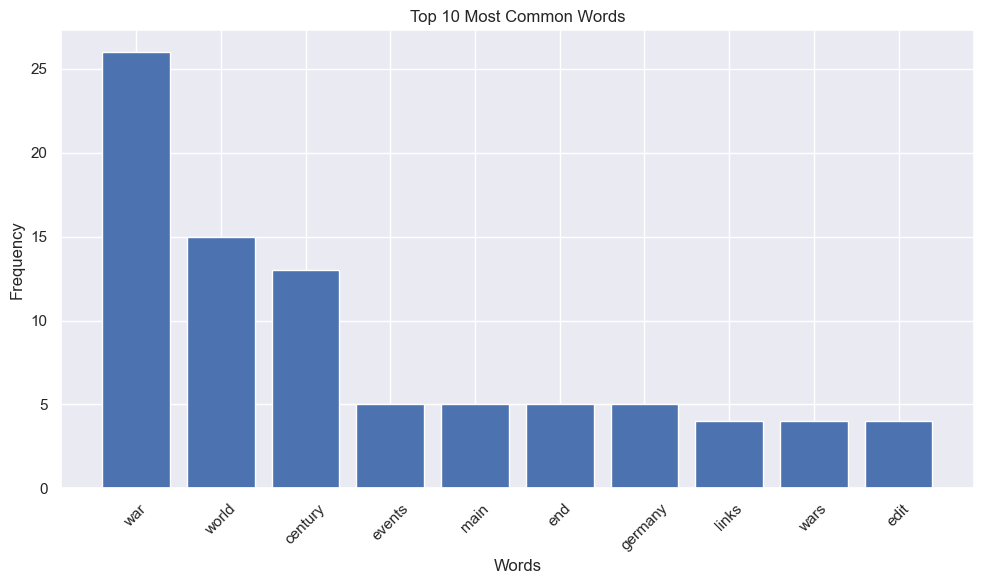

In [41]:
# Frequency Distribution Bar Chart

# Extract the words and frequencies for the top 10 most common words
top_10_words = [item[0] for item in condensed_most_common[:10]]
top_10_frequencies = [item[1] for item in condensed_most_common[:10]]

plt.figure(figsize=(10, 6))
plt.bar(top_10_words, top_10_frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

##### 5. Create a tags list using TextBlob

In [42]:
new_stopwords2 = ["And", "Then", 'n', 't', 's', 'The']

In [43]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords2:
        filtered.append(word)

In [44]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 714 µs


In [45]:
text

TextBlob("['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'top', 'page', 'Search', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historical', 'events', 'th', 'century', 'Toggle', 'Historical', 'events', 'th', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation',

In [46]:
tags_list = text.tags

In [47]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Languages", 'NNS'),
 ("'", 'POS'),
 ("'Language", 'NN'),
 ("'links", 'NNS'),
 ("'", 'POS'),
 ("'top", 'NNP'),
 ("'", 'POS'),
 ("'page", 'NN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'N

##### 6. Create top 10 POS tags list

In [48]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [49]:
df_text.head(10)

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS
5,'th,NNP
6,',POS
7,'century,NNP
8,',POS
9,'Wikipedia,NNP


##### 7. Plot Top 10 POS list using seaborn

In [50]:
# Task 8 - With the help of AI, we've sorted our values into order of highest occurance to least, and plotted them in a bar using seaborn

In [51]:
word_type_totals = df_text['Word type'].value_counts().reset_index()
word_type_totals.columns = ['Word type', 'Total Frequency']

In [52]:
word_type_totals_sorted = word_type_totals.sort_values(by='Total Frequency', ascending=False)

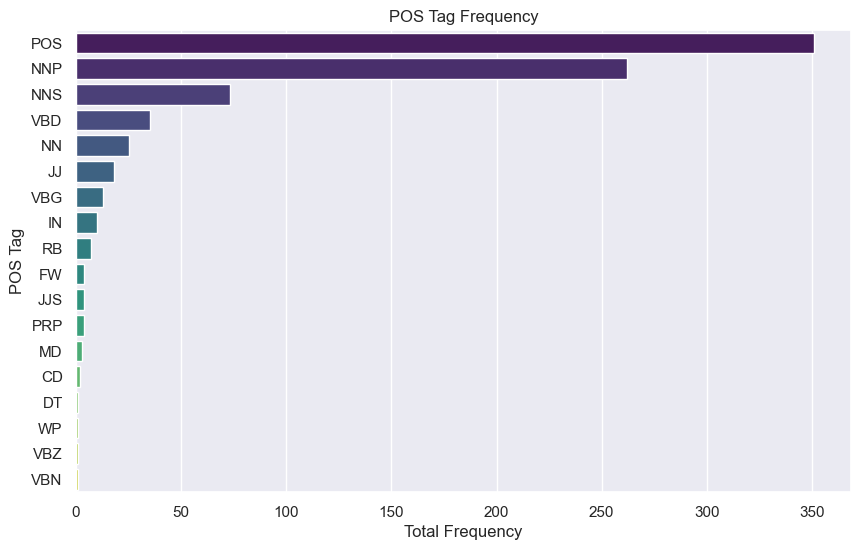

In [53]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Total Frequency', y='Word type', data=word_type_totals_sorted, palette='viridis')
plt.title('POS Tag Frequency')
plt.xlabel('Total Frequency')
plt.ylabel('POS Tag')
plt.show()

##### 8. Create bar plots for top 15 nouns, verbs & adjectives

In [54]:
# Task 9 - Below you will find top 15 bar plots for nouns, verbs and adjectives. All were grouped by their 'wordtype' before creating the plots
# To begin, we created a 'wordtype' plot to help us understand the most frequently used types. After this is completed, you can see the breakdowns for nouns (NN), verbs (VB, VBD), and adjectives (JJ)

In [55]:
# Grouping words by their 'wordtype'
df_t = df_text.groupby('Word type').count().reset_index()

In [56]:
df_t.head()

,Word type,Words
0,CD,2
1,DT,1
2,FW,4
3,IN,10
4,JJ,18


In [57]:
# creating list of top 15 words
top15 = df_t.nlargest(15, 'Words')

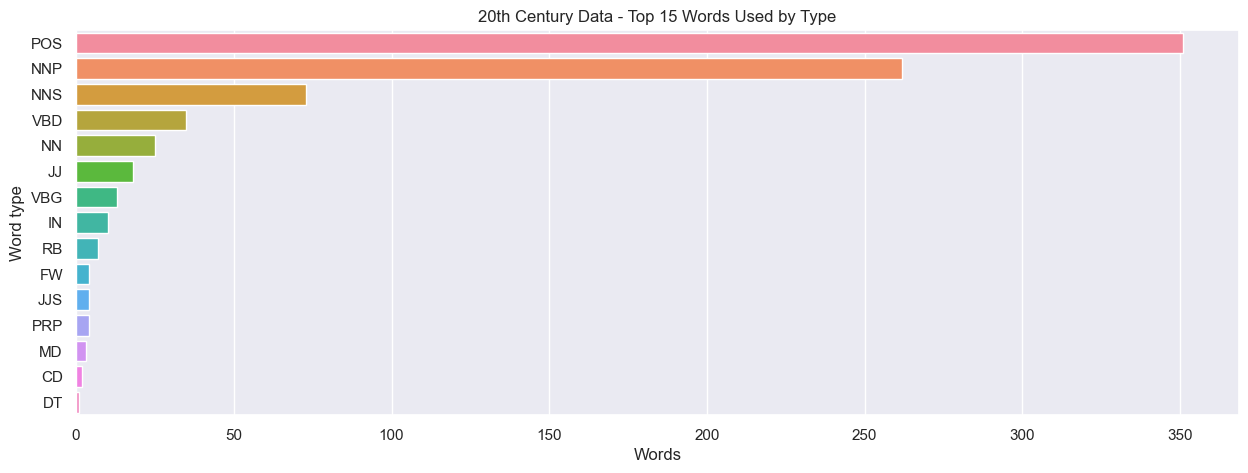

In [58]:
# Creating the Bar Plot

plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top15).set_title("20th Century Data - Top 15 Words Used by Type")

In [59]:
# looking through top 15 nouns in the article (NN)

df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15nouns = y.nlargest(15, 'Occurrences')

In [60]:
top15nouns

,Word,Occurrences
45,'events,5
54,'links,4
73,'wars,3
7,'Germans,3
43,'empires,2
67,'sides,2
19,'Tools,2
30,'chance,2
31,'changes,2
15,'Powers,2


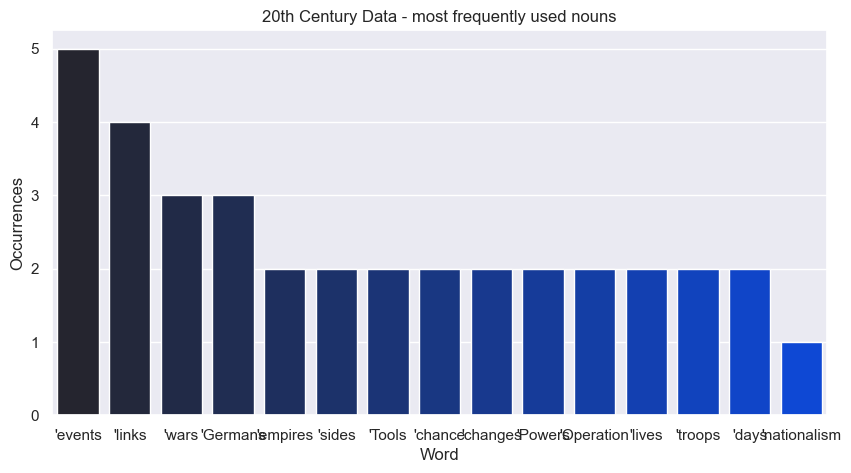

In [61]:
# Plotting our top 15 nouns

plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurrences",
    saturation=0.9, data = top15nouns).set_title("20th Century Data - most frequently used nouns")

In [62]:
# Looking at top 15 verbs in the article now

df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15verbs = y.nlargest(15, 'Occurrences')

In [63]:
top15verbs

,Word,Occurrences
0,'Allied,3
4,'caused,3
15,'led,2
10,'ended,2
27,'used,2
5,'ceded,1
17,'marked,1
26,'unprecedented,1
25,'termed,1
24,'started,1


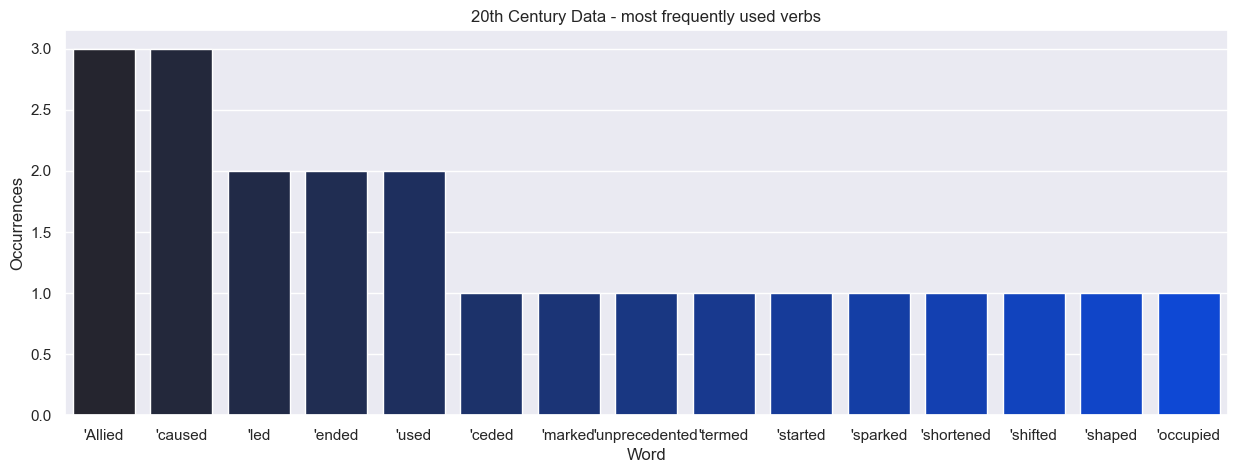

In [64]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurrences",
    saturation = 0.9, data = top15verbs).set_title("20th Century Data - most frequently used verbs")

In [65]:
# looking at top 15 adjectives now

df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurrences'], ascending=False)
top15adj = y.nlargest(15, 'Occurrences')

In [66]:
top15adj

,Word,Occurrences
4,'Historical,3
0,'American,1
1,'Baltic,1
2,'Bosnian,1
3,'Edwardian,1
5,'Hungarian,1
6,'Japanese,1
7,'PDFPrintable,1
8,'Russian,1
9,'Serbian,1


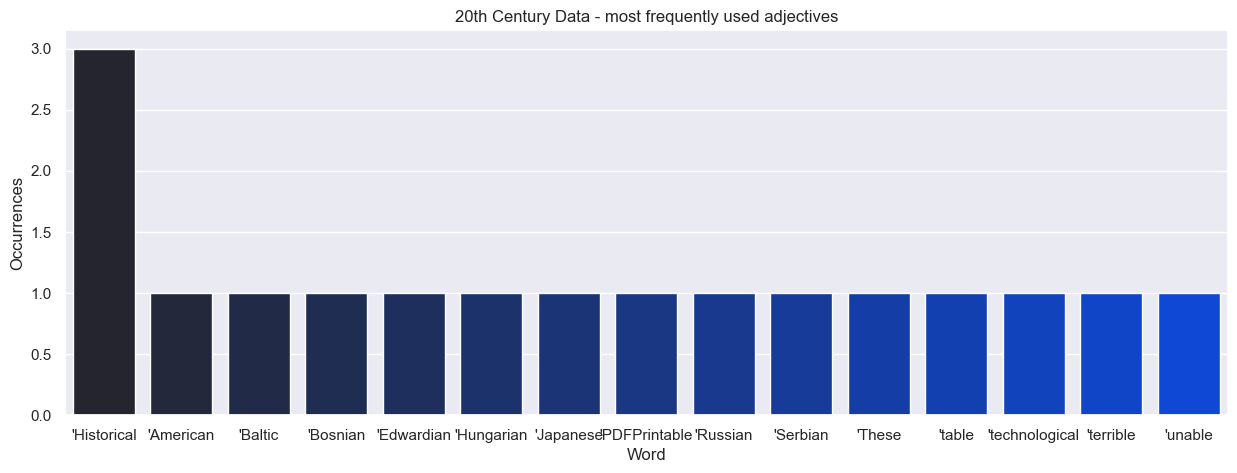

In [67]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurrences",
    saturation=0.9, data=top15adj).set_title("20th Century Data - most frequently used adjectives")

In [68]:
# Task 9 - Feedback: "what do you think stands out in these frequencies?"
# I approached this question by asking 'without any context what would these words together describe to you?' I think war, or mention of possibly many wars, is a stand out. 
# Multiple mentions of different countries stands out in the adjective list. 
# The verb list has many words that appear as 'war' or 'large politcal change' to me. For example: 'started', 'sparked', 'shortened', and 'shifted'.
# I am aware this list is just 1000 words rather than the entire article.

##### 9. Create countries dataframe

In [70]:
# Task 10 - Creating the countries dataframe, and the number of times they're mentioned in the text

In [71]:
# Defining the file path

file_path = "C:\\Users\\repla\\OneDrive\\Documents\\School\\Data Visualizations with Python\\20th-century\\countries_list_20th_century_1.5.csv"

In [72]:
# Import the CSV file into a dataframe named 'countries'

countries = pd.read_csv(file_path)

In [73]:
pd.set_option('display.max_rows', None)

In [74]:
print(countries)

     Unnamed: 0                          country_name
0             1                          Afghanistan 
1             2                              Albania 
2             3                              Algeria 
3             4                              Andorra 
4             5                               Angola 
5             6                  Antigua and Barbuda 
6             7                            Argentina 
7             8                              Armenia 
8             9                            Australia 
9            10                              Austria 
10           11                            Azerbaijan
11           12                         Bahamas, The 
12           13                              Bahrain 
13           14                           Bangladesh 
14           15                             Barbados 
15           16                              Belarus 
16           17                              Belgium 
17           18             

In [75]:
# Renaming the columns for clarity

countries = countries.rename(columns={'country_name': 'country', 'Unnamed: 0': 'count'})

In [76]:
countries.head()

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [77]:
# We're going to clean the dataset. First, we are going to remove duplicates

In [78]:
# Remove potential duplicates based on the 'country' column
countries_cleaned = countries.drop_duplicates(subset=['country'])


In [79]:
# Resetting the index after removing duplicates
countries_cleaned = countries_cleaned.reset_index(drop=True)

In [82]:
# This lets us know how many countries are now included in our dataset.
len(countries_cleaned)

209

In [88]:
countries_cleaned

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
5,6,Antigua and Barbuda
6,7,Argentina
7,8,Armenia
8,9,Australia
9,10,Austria


In [47]:
#Re-importing libraries, I had to start over but wanted to use the same notebook.

from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
# Defining the file path

file_path = "C:\\Users\\repla\\OneDrive\\Documents\\School\\Data Visualizations with Python\\20th-century\\countries_list_20th_century_1.5.csv"

In [7]:
# Import the CSV file into a dataframe named 'countries'

countries = pd.read_csv(file_path)

In [8]:
# Import the CSV file into a dataframe named 'countries'

countries = pd.read_csv(file_path)

In [10]:
# Renaming the columns for clarity

countries = countries.rename(columns={'country_name': 'country', 'Unnamed: 0': 'count'})

In [11]:
countries.head()

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [12]:
# Remove potential duplicates based on the 'country' column
countries_cleaned = countries.drop_duplicates(subset=['country'])

In [13]:
# Resetting the index after removing duplicates
countries_cleaned = countries_cleaned.reset_index(drop=True)

In [14]:
# This lets us know how many countries are now included in our dataset.
len(countries_cleaned)

209

In [15]:
countries_cleaned

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
5,6,Antigua and Barbuda
6,7,Argentina
7,8,Armenia
8,9,Australia
9,10,Austria


In [9]:
pd.set_option('display.max_rows', None)

In [29]:
# With the help of AI, we reviewed our list of countries, and were provided a list of the countries that is in fact... not countries. We will not remove them from the dataset

In [41]:
# List of row numbers to remove
rows_to_remove = [
    196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208
]

In [42]:
# Removing rows by index
cleaned_countries = countries.drop(rows_to_remove).reset_index(drop=True)

In [43]:
cleaned_countries

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
5,6,Antigua and Barbuda
6,7,Argentina
7,8,Armenia
8,9,Australia
9,10,Austria


In [44]:
cleaned_countries.head()

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [45]:
# Remove the 'count' column
cleaned_countries = cleaned_countries.drop('count', axis=1)

In [46]:
cleaned_countries.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [56]:
# Remove row '70'
rows_to_remove2 = [70]

In [57]:
# Removing rows by index
cleaned_countries = countries.drop(rows_to_remove2).reset_index(drop=True)

In [58]:
cleaned_countries

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
5,6,Antigua and Barbuda
6,7,Argentina
7,8,Armenia
8,9,Australia
9,10,Austria


In [59]:
# Count occurrences of each country
country_counts = cleaned_countries['country'].value_counts().reset_index()

In [60]:
# Rename columns
country_counts.columns = ['country', 'count']

In [61]:
# Display the updated dataframe
print(country_counts)

                                  country  count
0                            Afghanistan       1
1                                Albania       1
2                               Pakistan       1
3                                  Palau       1
4                              Palestine       1
5                                 Panama       1
6                       Papua New Guinea       1
7                               Paraguay       1
8                                   Peru       1
9                            Philippines       1
10                                Poland       1
11                               Portugal      1
12                                  Qatar      1
13                               Romania       1
14                                Russia       1
15                                 Rwanda      1
16                 Saint Kitts and Nevis       1
17                           Saint Lucia       1
18      Saint Vincent and the Grenadines       1
19                  

##### 10. Plotting country mention frequency

In [51]:
# Task 11 - Create a plot showing the frequency of the number of times these countries are mentioned in the text

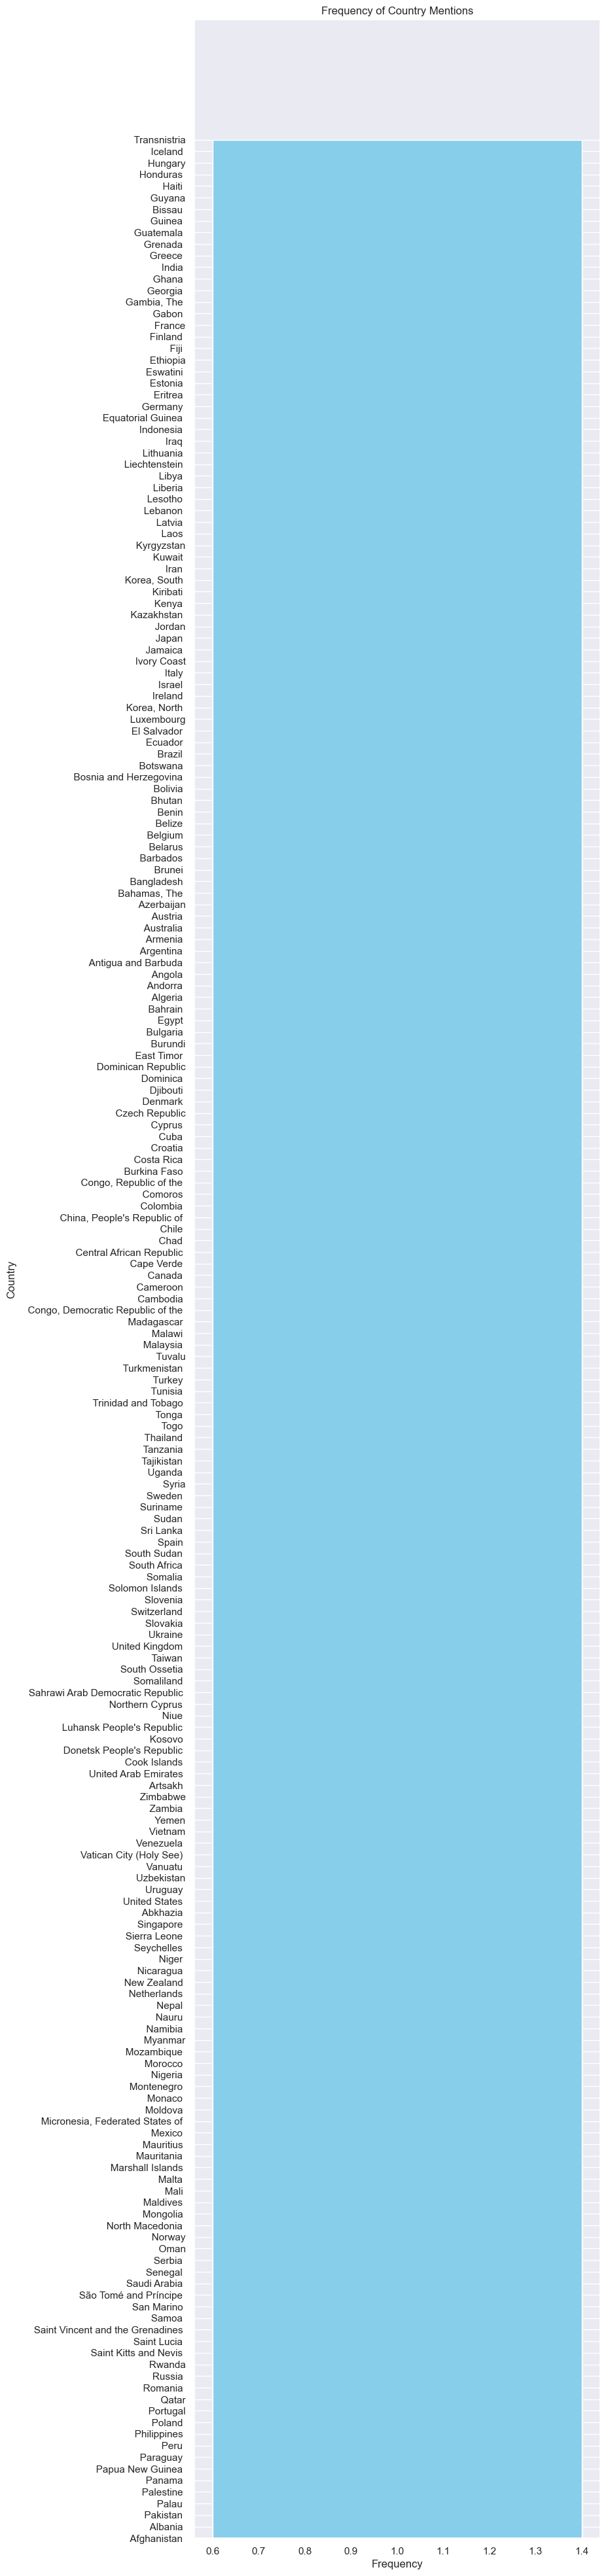

In [62]:
# Plot frequency of country mentions
plt.figure(figsize=(8, 50))
plt.bar(country_counts['count'], country_counts['country'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Frequency of Country Mentions')
plt.grid(axis='x')
plt.show()

In [63]:
# This list is still only showing a single mention for each country. I mentioned before in my previous submission that I may have been provided with the incorrect file, if not, that is great, but it does feel confusing. 
# I look forward to your feedback on this. Thank you